<a href="https://colab.research.google.com/github/drcrajc/iu_seminar_ai/blob/main/confmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

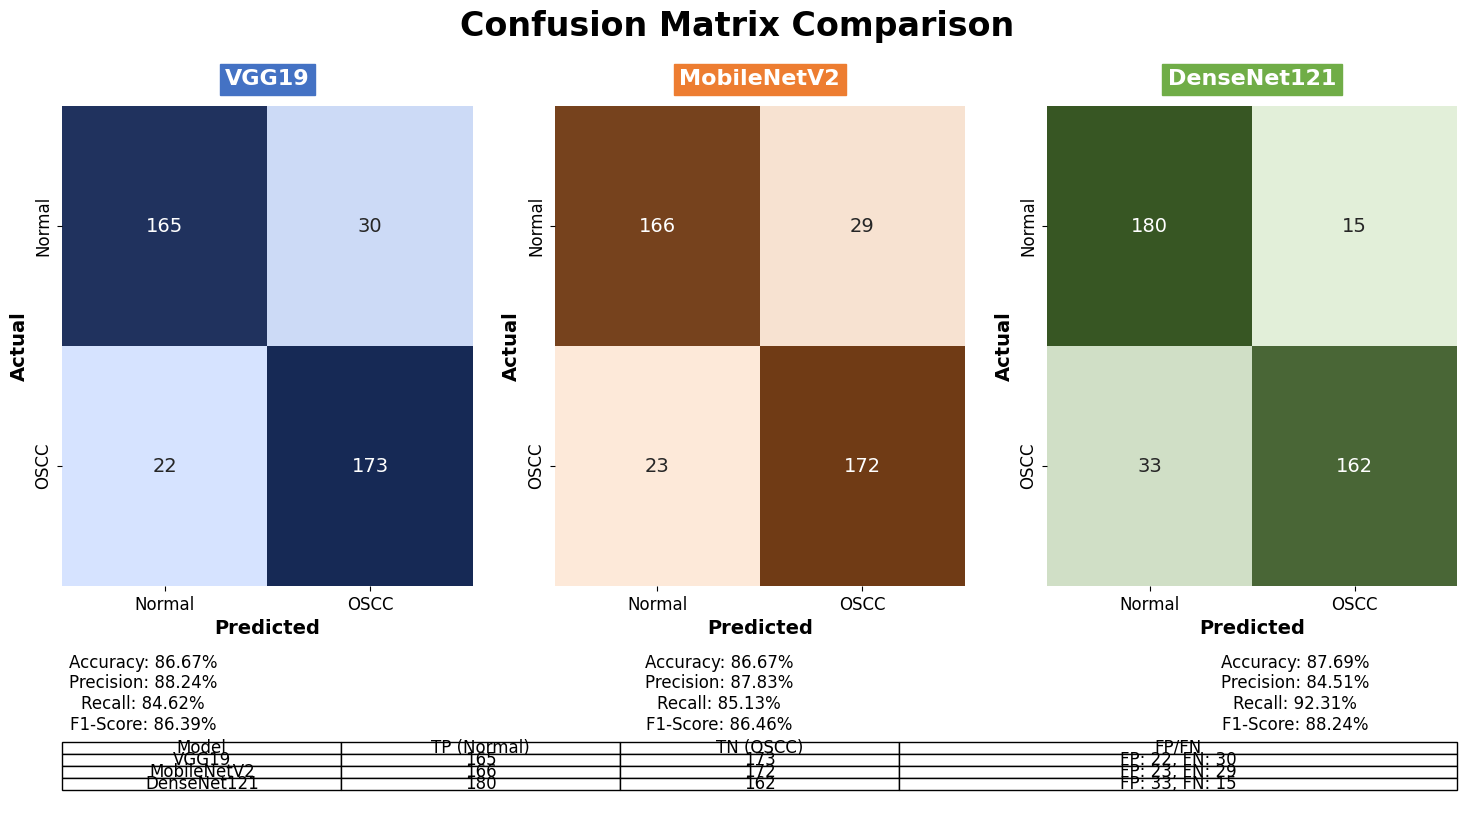

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Define confusion matrices
vgg19_matrix = np.array([[165, 30], [22, 173]])
mobilenet_matrix = np.array([[166, 29], [23, 172]])
densenet_matrix = np.array([[180, 15], [33, 162]])

# Define class labels
class_labels = ['Normal', 'OSCC']

# Calculate metrics
def calculate_metrics(cm):
    tp, fn = cm[0]
    fp, tn = cm[1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {
        'Accuracy': f'{accuracy:.2%}',
        'Precision': f'{precision:.2%}',
        'Recall': f'{recall:.2%}',
        'F1-Score': f'{f1:.2%}'
    }

# Compute metrics
vgg19_metrics = calculate_metrics(vgg19_matrix)
mobilenet_metrics = calculate_metrics(mobilenet_matrix)
densenet_metrics = calculate_metrics(densenet_matrix)

# Define custom colormaps
vgg_cmap = LinearSegmentedColormap.from_list('vgg', ['#d6e3ff', '#162955'], 256)
mobilenet_cmap = LinearSegmentedColormap.from_list('mobilenet', ['#fde9d9', '#703b15'], 256)
densenet_cmap = LinearSegmentedColormap.from_list('densenet', ['#e2efd9', '#375623'], 256)

# Create figure and grid layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 3, height_ratios=[4, 1, 1], hspace=0.5)

# Add confusion matrices
models = ['VGG19', 'MobileNetV2', 'DenseNet121']
matrices = [vgg19_matrix, mobilenet_matrix, densenet_matrix]
cmaps = [vgg_cmap, mobilenet_cmap, densenet_cmap]
metrics_list = [vgg19_metrics, mobilenet_metrics, densenet_metrics]
title_colors = {'VGG19': '#4472C4', 'MobileNetV2': '#ED7D31', 'DenseNet121': '#70AD47'}

for i, (matrix, cmap, title, metrics) in enumerate(zip(matrices, cmaps, models, metrics_list)):
    ax = fig.add_subplot(gs[0, i])

    # Plot confusion matrix
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=class_labels, yticklabels=class_labels,
                cbar=False, ax=ax, annot_kws={"size": 14})

    # Title styling
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15, color='white', backgroundcolor=title_colors[title])

    # Axis labels
    ax.set_xlabel('Predicted', fontsize=14, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=14, fontweight='bold')

    # Adjust label font sizes
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Add metrics text below
    metrics_text = "\n".join([f"{k}: {v}" for k, v in metrics.items()])
    fig.text(0.17 + 0.32 * i, 0.38, metrics_text, fontsize=12, ha='center')

# Table below confusion matrices
ax_table = fig.add_subplot(gs[1, :])
ax_table.axis('off')

# Table data
table_data = [
    ['Model', 'TP (Normal)', 'TN (OSCC)', 'FP/FN'],
    ['VGG19', vgg19_matrix[0, 0], vgg19_matrix[1, 1], f'FP: {vgg19_matrix[1, 0]}, FN: {vgg19_matrix[0, 1]}'],
    ['MobileNetV2', mobilenet_matrix[0, 0], mobilenet_matrix[1, 1], f'FP: {mobilenet_matrix[1, 0]}, FN: {mobilenet_matrix[0, 1]}'],
    ['DenseNet121', densenet_matrix[0, 0], densenet_matrix[1, 1], f'FP: {densenet_matrix[1, 0]}, FN: {densenet_matrix[0, 1]}']
]

# Create table
table = ax_table.table(cellText=table_data, cellLoc='center', loc='center', colWidths=[0.2, 0.2, 0.2, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust row heights
for i, row in enumerate(table.get_celld().values()):
    row.set_height(0.1)

# Add final adjustments
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.3)
plt.suptitle('Confusion Matrix Comparison', fontsize=24, fontweight='bold')

# Show plot
plt.show()
